<a href="https://colab.research.google.com/github/charliesire/formation_ciroquo_github/blob/main/Notebooks_google_colab/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [ ]:

# install prerequisite rlibkriging, and HDF5 lib (for save/load kriging objects)
shell_call <- function(command, ...) { # required for later call of shell...

  result <- system(command, intern = TRUE, ...)

  cat(paste0(result, collapse = "\n"))

}

shell_call('apt update && apt install cmake gfortran')
install.packages('BiocManager',repos='https://cloud.r-project.org')

BiocManager::install('Rhdf5lib')

install.packages('rlibkriging')

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,014 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [996 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:13 https://developer.download.nvidia.com/compute

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Rhdf5lib'”
Old packages: 'bit', 'devtools', 'gargle', 'highr', 'isoband', 'knitr',
  'openssl', 'rmarkdown', 'roxygen2', 'whisker', 'boot', 'foreign', 'Matrix',
  'nlme'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(devtools)
install_github("tranvivielodie/GpOutput2D/GpOutput2D")

Skipping install of 'GpOutput2D' from a github remote, the SHA1 (9f779d33) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
remotes::install_github("CharlieSire/FunQuant", upgrade="never") # from public github repo

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpGVozHo/remotes1483657a4d/charliesire-FunQuant-a3cf935/DESCRIPTION’ ... OK
* preparing ‘FunQuant’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
  NB: this package now depends on R (>= 3.5.0)
  serialize/load version 3 cannot be read in older versions of R.
  File(s) containing such objects:
    ‘FunQuant/ip.RData’
* building ‘FunQuant_0.1.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(FunQuant)

In [ ]:
install.packages("ggvoronoi")
install.packages("ggplot2")
install.packages("truncnorm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(truncnorm)
library(ggplot2)
library(ggvoronoi)

rgeos version: 0.6-4, (SVN revision 699)
 GEOS runtime version: 3.10.2-CAPI-1.16.0 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 




# Function to plot Voronoï diagram

In [ ]:
plot_voronoi = function(prototypes, outputs= NULL,xlim = c(0,1), ylim =c(0,1)){
  outline = as.data.frame(rbind(c(xlim[1],ylim[1]),c(xlim[1],ylim[2]), c(xlim[2],ylim[2]), c(xlim[2],ylim[1])))
  protos = as.data.frame(do.call("rbind", lapply(prototypes, function(i){t(i)})))
  res = ggplot(data = protos) +
    stat_voronoi(geom="path", aes(x=V1, y=V2), outline = outline) +
    geom_point(aes(x=V1,y=V2), shape = 9, size = 5, col = "red") + theme_bw()
  if(!is.null(outputs)){
      outputs = as.data.frame(t(outputs))
      colnames(outputs) = c("V1", "V2")
      res = res + geom_point(data = outputs, aes(x = V1, y = V2))
  }
  return(res)
}

# Variables

We consider $X = (X_{1},X_{2}) \in \mathbb{R}^2$ a random input of a computer code $H$, with
$$\left\{
    \begin{array}{ll}
        X_{i} \sim \mathcal{N}_{t}(0,0.25^2, -1, 1), i=1,2 \\
        X_{1} \text{ and }X_{2}\text{ independent}
    \end{array}
\right.$$

where $\mathcal{N}_{t}(\mu,\sigma^2, a, b)$ is the Gaussian distribution of mean $\mu$, variance $\sigma^2$, truncated between $a$ and $b$.

In [ ]:
fX = function(x){
  return(
    dtruncnorm(x = x[1],mean = 0,sd = 0.25,a=-1, b=1)*dtruncnorm(x = x[2],mean = 0,sd = 0.25,a=-1, b=1))
}

The density function of $X$, denoted $f_{X}$, is represented below


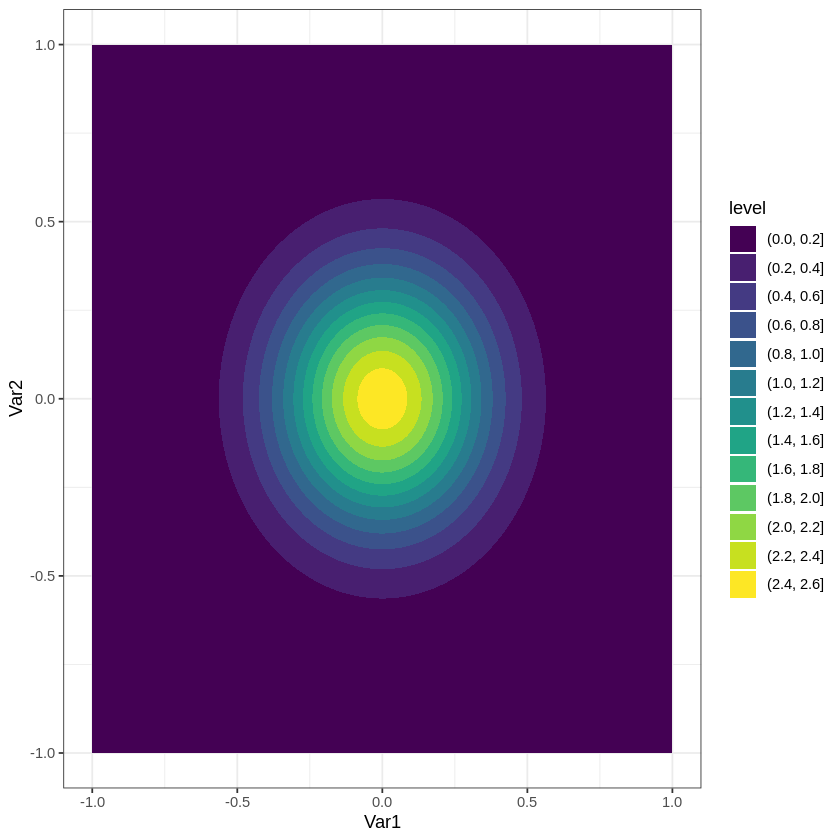

In [ ]:
df_plot = as.data.frame(expand.grid(seq(-1,1,l=300), seq(-1,1,l=300)))
df_plot = cbind(df_plot, fX = apply(df_plot, 1, fX))
ggplot(df_plot,aes(x = Var1, y = Var2, z = fX)) + geom_contour_filled() + theme_bw()

The computer code $H$ is defined with

$$H(x) = \left\{
    \begin{array}{ll}
        (0,0) \text{ if } \lvert x_{1}\rvert \leq \alpha \\
        (\lvert x_{1} \rvert - \alpha, \lvert x_{2} \rvert) \text{ otherwise.}
    \end{array}
\right.$$

with $\alpha$ such that $P(H(X) = (0,0)) = 0.97.$

In [ ]:
ptrunc = -1+2*pnorm(1, 0,0.25)

alpha = qnorm(1.97*ptrunc/2, 0, 0.25)

H = function(x){
  if(abs(x[1]) < alpha){return(c(0,0))}
  else{return(c(abs(x[1])-alpha, abs(x[2])))}
}

# Classical Lloyd

This is the function to sample $X$ with density function $f_{X}$.

In [ ]:
sample_fX = function(n){cbind(rtruncnorm(n = n, mean = 0, sd = 0.25, a = -1, b = 1), rtruncnorm(n = n, mean = 0, sd = 0.25, a = -1, b = 1))}

Quantize $H(X)$ with $2000$ points, 3 starts and 5 cells

In [ ]:
set.seed(1)
inputs_fX = sample_fX(2000)
outputs_fX = apply(inputs_fX,1,H)
density_ratio_fX = rep(1, nrow(inputs_fX))

res_proto_fX = find_prototypes(data = outputs_fX,
                            nb_cells = 5,
                            multistart = 3,
                            density_ratio = density_ratio_fX)

Warning message:
“GEOS support is provided by the sf and terra packages among others”
Warning message:
“GEOS support is provided by the sf and terra packages among others”


[1] 0.9670 0.0100 0.0130 0.0035 0.0065

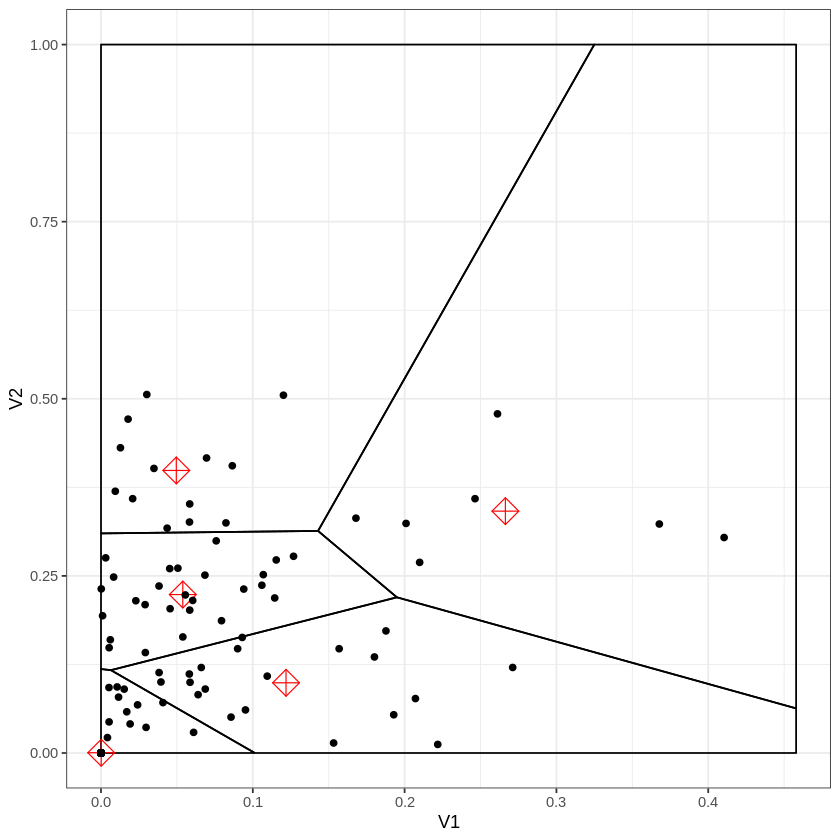

In [ ]:
plot_voronoi(res_proto_fX$prototypes, outputs_fX, xlim = c(0, 1-alpha))

res_proto_fX$probas

# Std deviations

With $1000$ bootstrap samples, we estimate the standard deviations of the estimators of the centroids of the optimal Voronoï cells

In [ ]:
set.seed(1)
std_centroid_fX = std_centroid(data = outputs_fX,
              prototypes_list = list(res_proto_fX$prototypes),
              cells = 1:5,
              density_ratio = density_ratio_fX,
              bootstrap = 1000)

std_centroid_fX

[[1]]
[[1]][[1]]
[1] 4.877064e-05 1.225640e-04

[[1]][[2]]
[1] 0.015091657 0.009624198

[[1]][[3]]
[1] 0.007660927 0.008473096

[[1]][[4]]
[1] 0.03480654 0.02556917

[[1]][[5]]
[1] 0.009721124 0.018218002

And also the relative standard deviations of the estimators of the membership probabilities for the optimal Voronoï cells

In [ ]:
set.seed(1)
std_proba_fX = std_proba(data = outputs_fX,
              prototypes_list = list(res_proto_fX$prototypes),
              cells = 1:5,
              density_ratio = density_ratio_fX,
              bootstrap = 3000)

std_proba_fX

[[1]]
[1] 0.004160435 0.224674415 0.196645914 0.371961139 0.273459524

# Uniform sampling

We introduce the uniform density $g$ and the function to sample $\tilde{X}$ with density function $g$.

In [ ]:
g = function(x){
  if(sum((x>-1)*(x<1))==2){return(1/4)}
  else{return(0)}
}

sample_g = function(n){ cbind (runif(n,-1,1), runif (n,-1,1))}

Quantize $H(X)$ with $2000$ points, 3 starts and 5 cells


In [ ]:
set.seed(1)
inputs_unif = sample_g(2000)
outputs_unif = apply(inputs_unif,1,H)
density_ratio_unif = compute_density_ratio(f = fX,
                                      g = g,
                                      inputs = inputs_unif)

res_proto_unif = find_prototypes(data = outputs_unif,
                            nb_cells = 5,
                            multistart = 3,
                            density_ratio = density_ratio_unif)

Warning message:
“GEOS support is provided by the sf and terra packages among others”
Warning message:
“GEOS support is provided by the sf and terra packages among others”


[1] 0.902620274 0.011127298 0.007878749 0.002916292 0.003803653

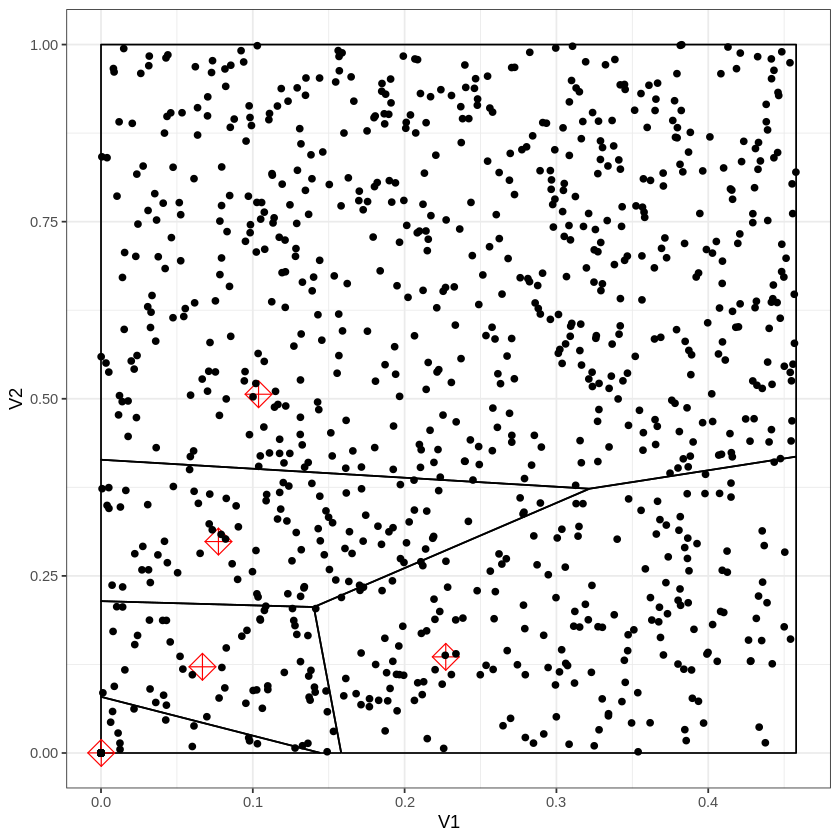

In [ ]:
plot_voronoi(res_proto_unif$prototypes, outputs_unif, xlim = c(0, 1- alpha))

res_proto_unif$probas

With $1000$ bootstrap samples, we estimate the standard deviations of the estimators of the centroids of the optimal Voronoï cells

In [ ]:
set.seed(1)

std_centroid_unif = std_centroid(data = outputs_unif,
              prototypes_list = list(res_proto_unif$prototypes),
              cells = 1:5,
              density_ratio = density_ratio_unif,
              bootstrap = 1000)

std_centroid_unif

[[1]]
[[1]][[1]]
[1] 5.352177e-05 5.078715e-05

[[1]][[2]]
[1] 0.006566517 0.007657964

[[1]][[3]]
[1] 0.007169251 0.006800069

[[1]][[4]]
[1] 0.007316887 0.007114467

[[1]][[5]]
[1] 0.005491915 0.007195928

Comparison with the sample with $f_{X}$


In [ ]:
lapply(1:length(std_centroid_unif[[1]]), function(x){std_centroid_fX[[1]][[x]]/std_centroid_unif[[1]][[x]]})


[[1]]
[1] 0.911230 2.413287

[[2]]
[1] 2.298274 1.256757

[[3]]
[1] 1.068581 1.246031

[[4]]
[1] 4.757014 3.593969

[[5]]
[1] 1.770079 2.531710

And also the relative standard deviations of the estimators of the membership probabilities for the optimal Voronoï cells


In [ ]:
set.seed(1)

std_proba_unif = std_proba(data = outputs_unif,
              prototypes_list = list(res_proto_unif$prototypes),
              cells = 1:5,
              density_ratio = density_ratio_unif,
              bootstrap = 3000)

std_proba_unif

[[1]]
[1] 0.04738285 0.14528517 0.12997445 0.10485124 0.10872479

Comparison with the sample with $f_{X}$. It highlights the fact that sampling with $f_{X}$ is much better for the first Voronoï cells, but not for the others.


In [ ]:
std_proba_fX[[1]]/std_proba_unif[[1]]


[1] 0.08780466 1.54643732 1.51295820 3.54751298 2.51515342

Example of the estimation of the standard deviation without bootstrapping


In [ ]:
large_sample_unif = sample_g(n=10^5)
large_outputs_unif = apply(large_sample_unif, 1, H)
large_density_ratio_unif = compute_density_ratio(f = fX, g = g, inputs = large_sample_unif)


std_proba_unif_large = std_proba(data = large_outputs_unif,
              prototypes_list = list(res_proto_unif$prototypes),
              cells = 1:5,
              density_ratio = large_density_ratio_unif,
              nv = 2000)

std_proba_unif_large

[[1]]
[1] 0.04681194 0.14922263 0.12994512 0.10453974 0.10619227

## Hybrid sampling

As the uniform sampling reduces the variances for cells 2 to 5 but not for cell 1, an idea can be to sample with $f_{X}$ for cell 1 and with uniform sampling for the other cells.

Then we will create a list for these two samplings: the first element of the list is the sampling with $f_{X}$, and the second one the uniform sampling.

The argument "sampling\_cells" indicates for each cell the associated index in the sampling list.

In [ ]:
set.seed(1)
sampling_cells = c(1,2,2,2,2)

outputs_hybrid = list(outputs_fX, outputs_unif)
density_ratio_hybrid = list(density_ratio_fX, density_ratio_unif)

res_proto_hybrid = find_prototypes(data = outputs_hybrid,
                            nb_cells = 5,
                            multistart = 2,
                            density_ratio = density_ratio_hybrid,
                            method_IS = "percell",
                            sampling_cells = sampling_cells)


Warning message:
“GEOS support is provided by the sf and terra packages among others”
Warning message:
“GEOS support is provided by the sf and terra packages among others”


[1] 0.967500000 0.009135434 0.006531706 0.005916397 0.001848947

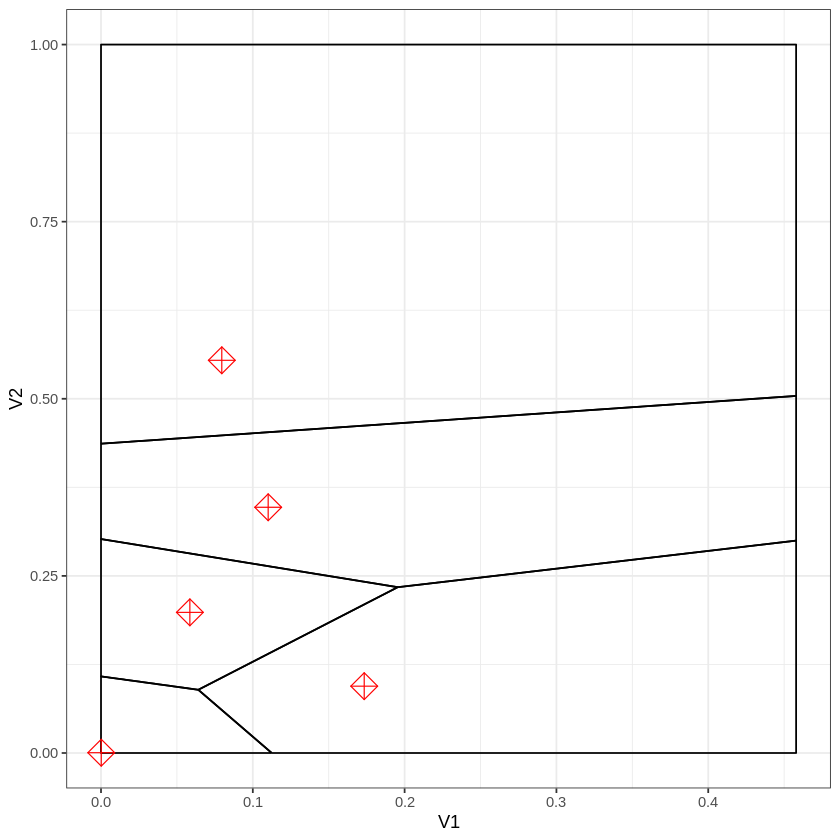

In [ ]:
plot_voronoi(res_proto_hybrid$prototypes, xlim = c(0, 1-alpha))

res_proto_hybrid$probas

In [ ]:
set.seed(1)

std_centroid_hybrid = lapply(1:5,function(i){
  std_centroid(prototypes_list = list(res_proto_hybrid$prototypes),
  density_ratio = density_ratio_hybrid[[sampling_cells[i]]],
  cells = i,
  data = outputs_hybrid[[sampling_cells[i]]],
  bootstrap = 1000
  )})

std_centroid_hybrid

[[1]]
[[1]][[1]]
[[1]][[1]][[1]]
[1] 5.825972e-05 1.301410e-04



[[2]]
[[2]][[1]]
[[2]][[1]][[1]]
[1] 0.006557959 0.007789433



[[3]]
[[3]][[1]]
[[3]][[1]][[1]]
[1] 0.007790450 0.004912605



[[4]]
[[4]][[1]]
[[4]][[1]][[1]]
[1] 0.008658594 0.004804458



[[5]]
[[5]][[1]]
[[5]][[1]][[1]]
[1] 0.007584828 0.008941356

In [ ]:
set.seed(1)
std_proba_hybrid = unlist(sapply(1:5,function(i){
  std_proba(prototypes_list = list(res_proto_hybrid$prototypes),
  density_ratio = density_ratio_hybrid[[sampling_cells[i]]],
  cells = i,
  data = outputs_hybrid[[sampling_cells[i]]],
  bootstrap = 3000
  )}))

std_proba_hybrid

[1] 0.004122599 0.155657912 0.120624496 0.115718671 0.125582840


## Evolving density

We plot the limits of the Voronoi cells

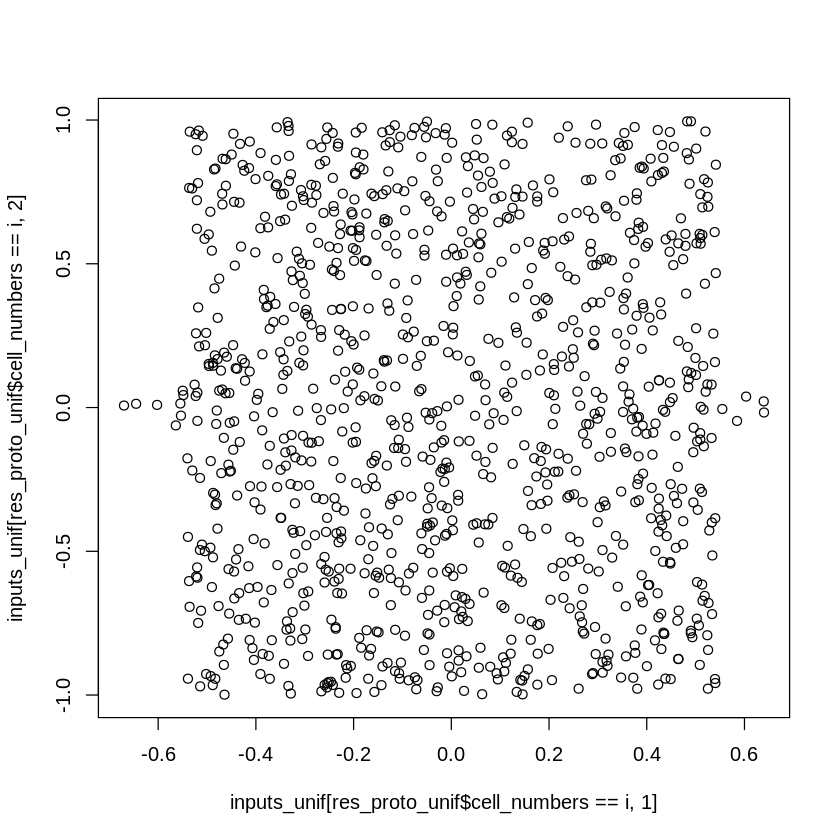

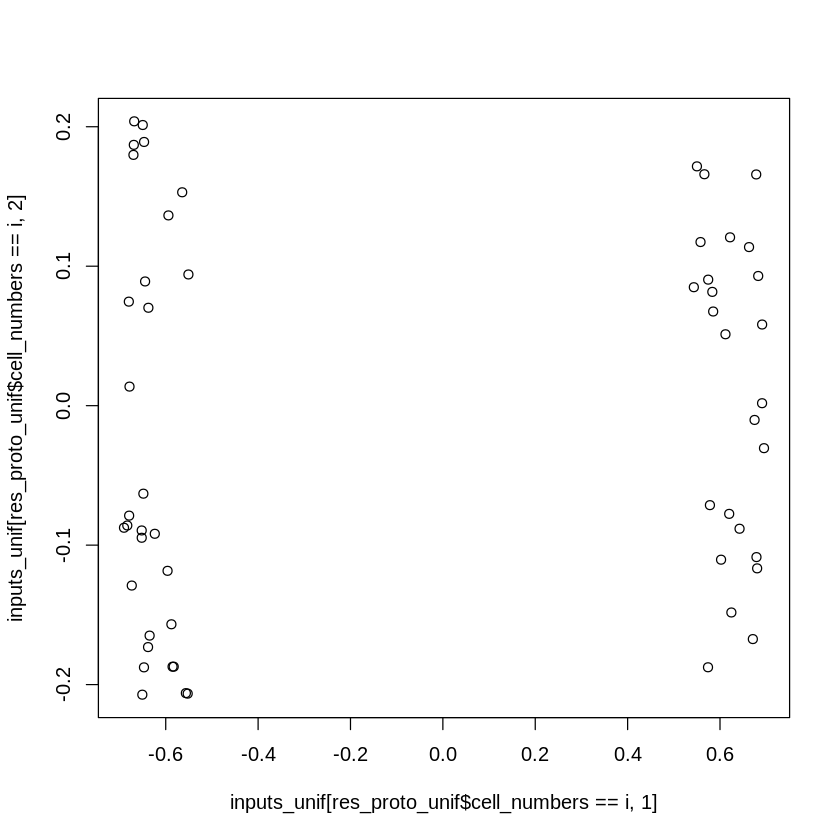

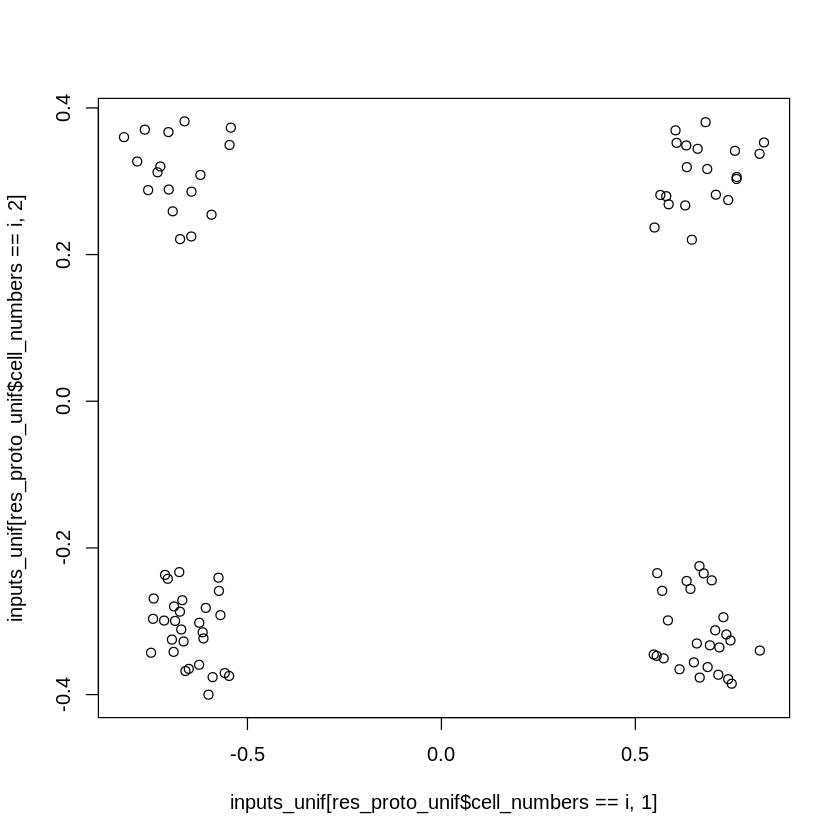

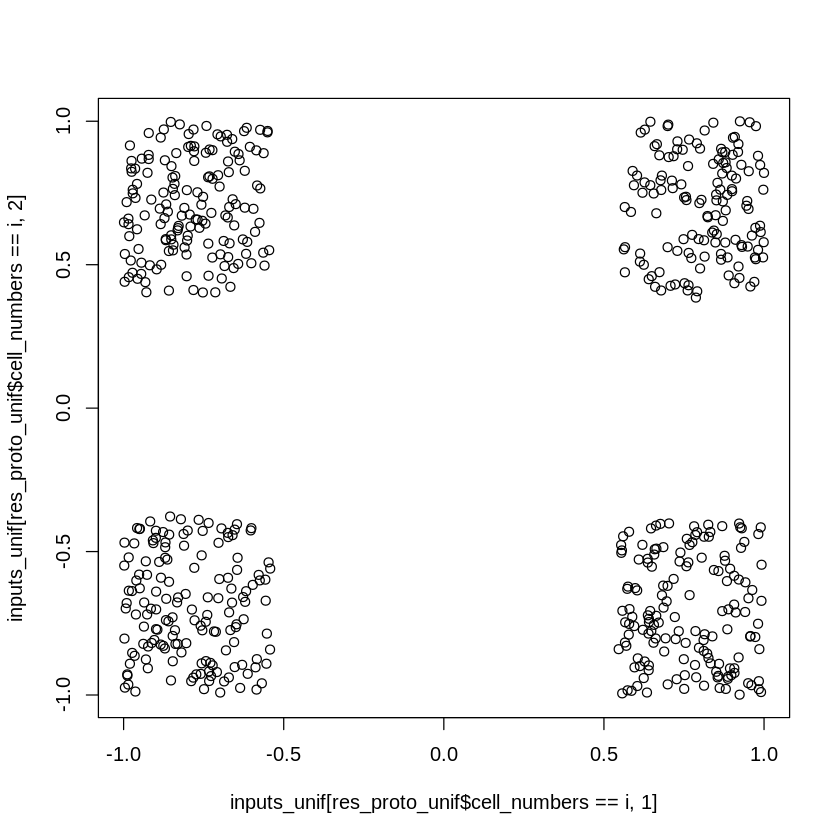

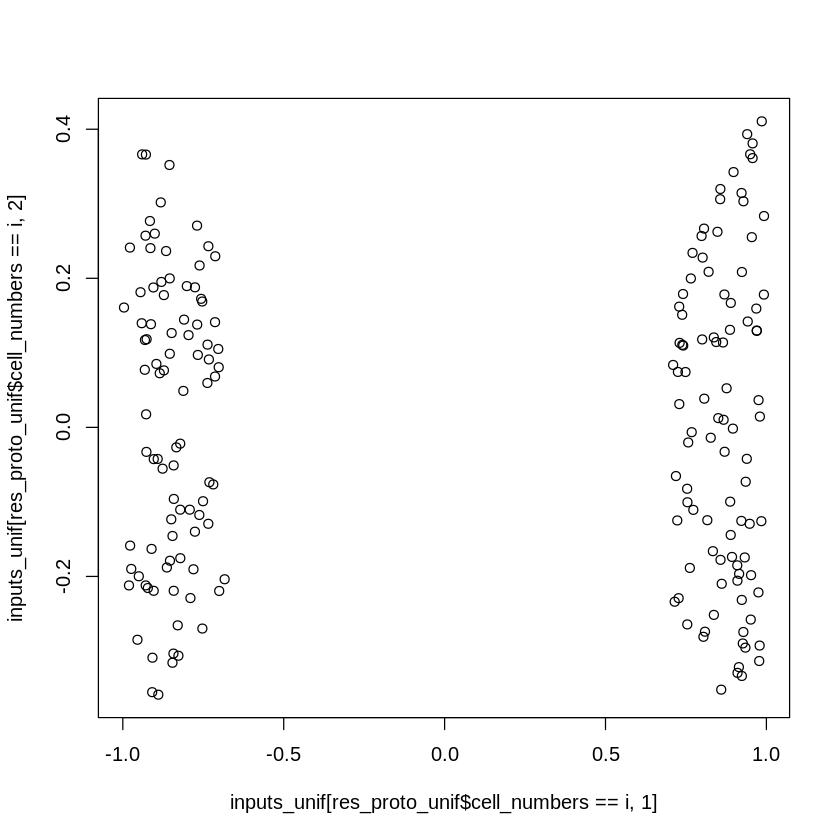

In [ ]:
for(i in 1:5){
  plot(inputs_unif[res_proto_unif$cell_numbers ==i,1],inputs_unif[res_proto_unif$cell_numbers == i,2])
}

We define the following function

g\_adapt(x, cell, c) =
$$\left\{
    \begin{array}{ll}
        cste \times c \:\:\:\:\text{ if } abs(x_{1}) \in [min(abs(cell[,1])), max(abs(cell[,1]))] \: \& \: abs(x_{2}) \in [min(abs(cell[,2])), max(abs(cell[,2]))]\\
        cste \:\:\:\:\text{ otherwise.}
    \end{array}
\right.$$

And the function create\_sample to sample from g\_adapt

In [ ]:
g_adapt = function(x,cell,coeff){
  maxs = apply(abs(cell), 2, max)
  mins = apply(abs(cell),2,min)
  A = prod(maxs-mins)
  c1 = 1/(coeff*A+1-A)/4
  x = abs(x)
  if(sum((maxs-x)>0) == 2 & sum((x-mins)>0) == 2) {return(coeff*c1)}
  else{return(c1)}
}

create_sample = function(n, cell, coeff){
  maxs = apply(abs(cell), 2, max)
  mins = apply(abs(cell),2,min)
  A = prod(maxs-mins)

  prob1 = 1/(A*(coeff-1)+1)
  u = runif(n)

  tirage1 = matrix(runif(sum(u<prob1)*2)*2-1,ncol=2)
  tirage2 = cbind(sample(c(-1,1), size = sum(u>prob1), replace = TRUE)*(runif(sum(u>prob1))*(maxs[1]-mins[1])+mins[1]),sample(c(-1,1), size = sum(u>prob1), replace = TRUE)*(runif(sum(u>prob1))*(maxs[2]-mins[2])+mins[2]))
  return(as.data.frame(rbind(tirage1, tirage2)))
}


We then create a list density\_biased\_function with:

- The first element is fX
- The elements 2 to 5 is the function g\_adapt(x, cell, 10^3)

And we create a list of functions to generate 2000 inputs from the densities in density\_biased\_function

In [ ]:
density_biased_function = c(list(function(x, cell){fX(x)}), lapply(1:4, function(i){function(x, cell){g_adapt(x, cell, 10^3)}}))

samp_cell1 = function(cell){
  set.seed(10)
  sample_fX(2000)
}

inputs_function = c(list(samp_cell1), lapply(1:4,
  function(i){function(cell){
    set.seed(10)
    create_sample(2000,cell, 10^3)}}))

res_proto_pred_adapt = find_prototypes(
  starting_proto = res_proto_hybrid$prototypes,
  method_IS = "percell",
  density_ratio = density_adapt,
  sampling_cells = 1:5,
  inputs_ref = inputs_unif,
  data_ref = outputs_unif,
  density_function = fX,
  density_biased_function = density_biased_function,
  inputs_function = inputs_function,
  outputs_function = function(df){apply(df,1,H)},
  print_progress = TRUE,
  threshold = 0.01)

[1] "start number 1"
[1] "Iteration number 1"
[1] "Iteration number 2"
[1] "Iteration number 3"
[1] "Iteration number 4"
[1] "Iteration number 5"
[1] "Iteration number 6"
[1] "Iteration number 7"
[1] "Iteration number 8"
[1] "Iteration number 9"
[1] "Iteration number 10"
[1] "Iteration number 11"
[1] "Iteration number 12"
[1] "Iteration number 13"


Finally, we will assess the standard deviations for the optimal prototypes

We then need to reproduce the last samplings of the algorithm.

We get matrices of the points inside the Voronoi cells (here stored in cells\_reff), and then to generate inputs from these matrices, following the density density\_ratio\_adapt(x, cell).


In [ ]:
numbers_ref = get_cell_numbers(outputs_unif,res_proto_pred_adapt$prototypes)

cells_ref = lapply(1:5, function(h){as.data.frame(inputs_unif[numbers_ref == h,])}) ## get the

inputs_list = lapply(1:5, function(h){inputs_function[[h]](cells_ref[[h]])})

outputs_adapt = lapply(1:5, function(h){apply(inputs_list[[h]],1,H)})

density_ratio_adapt = lapply(1:5, function(h){compute_density_ratio(fX, function(x){density_biased_function[[h]](x, cells_ref[[h]])}, inputs_list[[h]])})

In [ ]:
set.seed(1)
std_centroid_adapt = lapply(1:5,function(i){
  std_centroid(prototypes_list = list(res_proto_pred_adapt$prototypes),
  density_ratio = density_ratio_adapt[[i]],
  cells = i,
  data = outputs_adapt[[i]],
  bootstrap = 1000
  )})

std_centroid_adapt


In [ ]:
lapply(1:length(std_centroid_unif[[1]]), function(x){std_centroid_adapt[[x]][[1]][[1]]/std_centroid_hybrid[[x]][[1]][[1]]})

In [ ]:
set.seed(1)
std_proba_adapt = unlist(sapply(1:5,function(i){
  std_proba(prototypes_list = list(res_proto_pred_adapt$prototypes),
  density_ratio = density_ratio_adapt[[i]],
  cells = i,
  data = outputs_adapt[[i]],
  bootstrap = 3000
  )}))

std_proba_adapt

Comparison with hybrid sampling and sampling with $f_{X}$


In [ ]:
std_proba_adapt/std_proba_hybrid
std_proba_adapt/std_proba_fX[[1]]

The reduction of the variances for the cells 2 to 5 is significative.
